**Importing Libraries**

In [40]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur
import requests
import numpy as np
import matplotlib.pyplot as plt

**Web Scraping**

In [6]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("span", attrs={"id":'productTitle'})
        
        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Function to extract Product Price

def get_price(soup):
    try:
        price_element = soup.find("span", attrs={'class': 'a-offscreen'})
        price = price_element.get_text().strip()

    except AttributeError:
        price = ""

    return price

# Function to extract Product Rating
def get_rating(soup):

    try:
        rating = soup.find("i", attrs={'class':'a-icon a-icon-star a-star-4-5'}).string.strip()
    
    except AttributeError:
        try:
            rating = soup.find("span", attrs={'class':'a-icon-alt'}).string.strip()
        except:
            rating = ""	

    return rating

# Function to extract Number of User Reviews
def get_review_count(soup):
    try:
        review_count = soup.find("span", attrs={'id':'acrCustomerReviewText'}).string.strip()

    except AttributeError:
        review_count = ""	

    return review_count

# Function to extract Availability Status
def get_availability(soup):
    try:
        available = soup.find("div", attrs={'id':'availability'})
        available = available.find("span").string.strip()

    except AttributeError:
        available = "Not Available"	

    return available

In [10]:
def scrape_amazon_data(user_agent, url_list):
    # Store the scraped data
    data = {"title": [], "price": [], "rating": [], "reviews": [], "availability": []}

    # Headers for the HTTP requests
    headers = {'User-Agent': user_agent, 'Accept-Language': 'en-US, en;q=0.5'}

    for url in url_list:
        # HTTP Request
        webpage = requests.get(url, headers=headers)
        soup = BeautifulSoup(webpage.content, "html.parser")

        # Fetch links as List of Tag Objects
        links = soup.find_all("a", attrs={'class': 'a-link-normal s-no-outline'})

        # Store the links
        links_list = [link.get('href') for link in links]

        # Loop for extracting product details from each link
        for link in links_list:
            new_webpage = requests.get("https://www.amazon.com" + link, headers=headers)
            new_soup = BeautifulSoup(new_webpage.content, "html.parser")

            # Function calls to extract necessary product information
            data['title'].append(get_title(new_soup))
            data['price'].append(get_price(new_soup))
            data['rating'].append(get_rating(new_soup))
            data['reviews'].append(get_review_count(new_soup))
            data['availability'].append(get_availability(new_soup))

    # Create a DataFrame from the scraped data
    amazon_df = pd.DataFrame.from_dict(data)
    amazon_df['title'].replace('', np.nan, inplace=True)
    amazon_df = amazon_df.dropna(subset=['title'])
    amazon_df.to_csv("amazon_data.csv", header=True, index=False)

**The Urls from which scraped data**

In [11]:
# URLs to scrape
urls = [
    "https://www.amazon.com/s?k=delllaptop&crid=R52JX64GOELT&sprefix=delllaptop%2Caps%2C315&ref=nb_sb_noss_2",
    "https://www.amazon.com/s?k=macbook&crid=34BJIQSQM1Z3K&sprefix=%2Caps%2C617&ref=nb_sb_ss_sx-complementary-recommendations-widget-desktop_6_0",
    "https://www.amazon.com/s?k=lenovo+laptop&crid=EE42QHXPP0E9&sprefix=lenovo+laptop%2Caps%2C330&ref=nb_sb_noss_1",
    "https://www.amazon.com/s?k=toshiba+laptop&crid=2B71BF0XEY05R&sprefix=toshiba+laptop%2Caps%2C324&ref=nb_sb_noss_1",
    "https://www.amazon.com/s?k=hp+laptop&crid=2FCIV44CS32UH&sprefix=hp+laptop%2Caps%2C321&ref=nb_sb_noss_1",
    "https://www.amazon.com/s?k=samsumg+laptop&crid=3UXP3NF588U2E&sprefix=samsumg+laptop%2Caps%2C327&ref=nb_sb_noss_2",
    "https://www.amazon.com/s?k=acer+laptop&crid=3NY7URMW4WGCN&sprefix=acer+laptop%2Caps%2C322&ref=nb_sb_noss_1",
    "https://www.amazon.com/s?k=ASUS+laptop&crid=571FVC65PN4G&sprefix=asus+laptop%2Caps%2C320&ref=nb_sb_noss_1"
]
user_agent = ""
scrape_amazon_data(user_agent,urls)

**Data Cleaning**

In [103]:
data=pd.read_csv('amazon_data.csv')

In [104]:
data.head()

,title,price,rating,reviews,availability
0,"Dell 2022 Newest Inspiron 15 Laptop, 15.6"" HD ...",$390.00,4.1 out of 5 stars,204 ratings,In Stock
1,"Dell 2022 Newest Inspiron 3000 Laptop, 15.6 HD...",$296.02,3.9 out of 5 stars,484 ratings,Only 13 left in stock - order soon
2,Dell Latitude 7490 14' FHD Laptop PC - Intel C...,$226.62,3.8 out of 5 stars,61 ratings,Only 12 left in stock - order soon.
3,Fast Dell Latitude E5470 HD Business Laptop No...,$173.00,4.1 out of 5 stars,"1,493 ratings",In Stock.
4,"Dell Latitude E7470 14in Laptop, Core i5-6300U...",$169.90,4.2 out of 5 stars,"1,093 ratings",In Stock.


In [105]:
data.dtypes

title           object
price           object
rating          object
reviews         object
availability    object
dtype: object

In [106]:
data['rating']

0      4.1 out of 5 stars
1      3.9 out of 5 stars
2      3.8 out of 5 stars
3      4.1 out of 5 stars
4      4.2 out of 5 stars
              ...        
231    3.9 out of 5 stars
232    4.4 out of 5 stars
233    5.0 out of 5 stars
234    4.6 out of 5 stars
235         Previous page
Name: rating, Length: 236, dtype: object

In [107]:
data['rating'] = data['rating'].str[:3]

In [108]:
data['rating']

0      4.1
1      3.9
2      3.8
3      4.1
4      4.2
      ... 
231    3.9
232    4.4
233    5.0
234    4.6
235    Pre
Name: rating, Length: 236, dtype: object

In [109]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

In [110]:
data['rating']

0      4.1
1      3.9
2      3.8
3      4.1
4      4.2
      ... 
231    3.9
232    4.4
233    5.0
234    4.6
235    NaN
Name: rating, Length: 236, dtype: float64

In [111]:
data['price'].head()

0    $390.00
1    $296.02
2    $226.62
3    $173.00
4    $169.90
Name: price, dtype: object

This code replaces the dollar sign ('$') and commas (',') in the 'price' column, and then converts the values to float using the astype(float) method. The resulting values will be numeric, allowing you to perform numerical operations and analysis on the 'price' column.

In [112]:
data['price'] = pd.to_numeric(data['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')

<ipython-input-112-7f85ae40d310>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = pd.to_numeric(data['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [113]:
data['price']

0       390.00
1       296.02
2       226.62
3       173.00
4       169.90
        ...   
231    1199.99
232     778.88
233     379.99
234     999.99
235     699.99
Name: price, Length: 236, dtype: float64

In [114]:
data.head()

,title,price,rating,reviews,availability
0,"Dell 2022 Newest Inspiron 15 Laptop, 15.6"" HD ...",390.00,4.1,204 ratings,In Stock
1,"Dell 2022 Newest Inspiron 3000 Laptop, 15.6 HD...",296.02,3.9,484 ratings,Only 13 left in stock - order soon
2,Dell Latitude 7490 14' FHD Laptop PC - Intel C...,226.62,3.8,61 ratings,Only 12 left in stock - order soon.
3,Fast Dell Latitude E5470 HD Business Laptop No...,173.00,4.1,"1,493 ratings",In Stock.
4,"Dell Latitude E7470 14in Laptop, Core i5-6300U...",169.90,4.2,"1,093 ratings",In Stock.


In [115]:
data['reviews']

0        204 ratings
1        484 ratings
2         61 ratings
3      1,493 ratings
4      1,093 ratings
           ...      
231       73 ratings
232       12 ratings
233        4 ratings
234       69 ratings
235              NaN
Name: reviews, Length: 236, dtype: object

Selecting only Digits in reviews column

In [116]:
data['reviews'] = pd.to_numeric(data['reviews'].str.extract('(\d+)')[0], errors='coerce')

In [117]:
data['reviews']=data['reviews'].astype('Int64')

In [118]:
data['reviews']

0       204
1       484
2        61
3         1
4         1
       ... 
231      73
232      12
233       4
234      69
235    <NA>
Name: reviews, Length: 236, dtype: Int64

In [119]:
data.head()

,title,price,rating,reviews,availability
0,"Dell 2022 Newest Inspiron 15 Laptop, 15.6"" HD ...",390.00,4.1,204,In Stock
1,"Dell 2022 Newest Inspiron 3000 Laptop, 15.6 HD...",296.02,3.9,484,Only 13 left in stock - order soon
2,Dell Latitude 7490 14' FHD Laptop PC - Intel C...,226.62,3.8,61,Only 12 left in stock - order soon.
3,Fast Dell Latitude E5470 HD Business Laptop No...,173.00,4.1,1,In Stock.
4,"Dell Latitude E7470 14in Laptop, Core i5-6300U...",169.90,4.2,1,In Stock.


In [120]:
data['availability'].tail()

231    In Stock
232    In Stock
233    In Stock
234    In Stock
235    In Stock
Name: availability, dtype: object

**Exploratory Data Analysis** 

Ploting the different categories of Stock(Availiability)

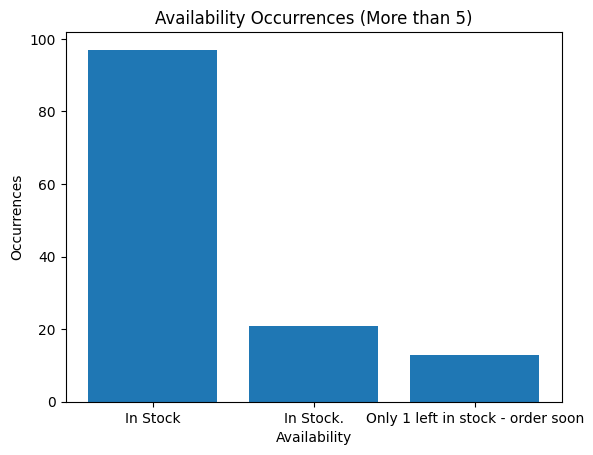

In [121]:
availability_counts = pd.Series(data['availability']).value_counts()
filtered_counts = availability_counts[availability_counts > 5]

plt.bar(filtered_counts.index.astype(str), filtered_counts.values)
plt.xlabel('Availability')
plt.ylabel('Occurrences')
plt.title('Availability Occurrences (More than 5)')
plt.show()

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         236 non-null    object 
 1   price         222 non-null    float64
 2   rating        228 non-null    float64
 3   reviews       227 non-null    Int64  
 4   availability  219 non-null    object 
dtypes: Int64(1), float64(2), object(2)
memory usage: 9.6+ KB


In [123]:
data.describe()

,price,rating,reviews
count,222.000000,228.000000,227.0
mean,554.678964,4.297807,145.502203
std,509.594391,0.405192,219.648701
min,14.990000,1.000000,1.0
25%,228.250000,4.100000,4.0
50%,389.495000,4.300000,32.0
75%,637.077500,4.500000,213.5
max,3199.000000,5.000000,993.0


Replacing the missing values with median

In [124]:
data.fillna(data.median(),inplace=True)

<ipython-input-124-12834809ce52>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(),inplace=True)
<ipython-input-124-12834809ce52>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.fillna(data.median(),inplace=True)


**Ploting Prices**

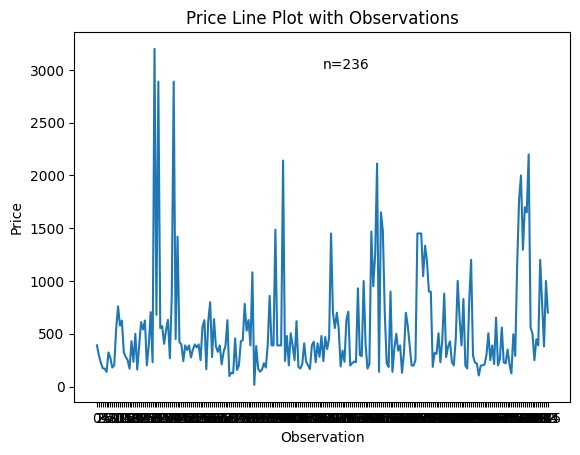

In [125]:
# Line plot
plt.plot(data['price'])
plt.xlabel('Observation')
plt.ylabel('Price')
plt.title('Price Line Plot with Observations')
plt.xticks(range(len(data['price'])))
plt.annotate(f"n={len(data['price'])}", (0.5, 0.9), xycoords='axes fraction')
plt.show()

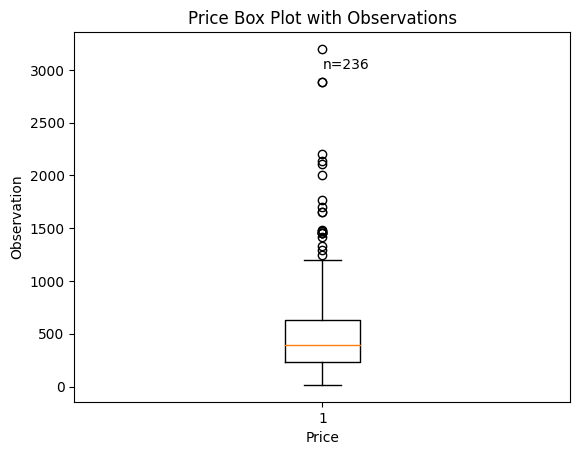

In [179]:
#BoxPlot
plt.boxplot(data['price'])
plt.xlabel('Price')
plt.ylabel('Observation')
plt.title('Price Box Plot with Observations')
plt.annotate(f"n={len(data['price'])}", (0.5, 0.9), xycoords='axes fraction')
plt.show()

**Ploting Product Ratings**

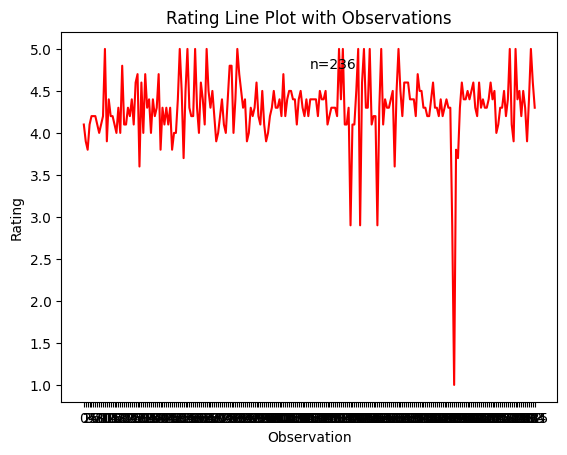

In [126]:
# Line plot for rating
plt.plot(data['rating'], color='red')
plt.xlabel('Observation')
plt.ylabel('Rating')
plt.title('Rating Line Plot with Observations')
plt.xticks(range(len(data['rating'])))
plt.annotate(f"n={len(data['rating'])}", (0.5, 0.9), xycoords='axes fraction')
plt.show()

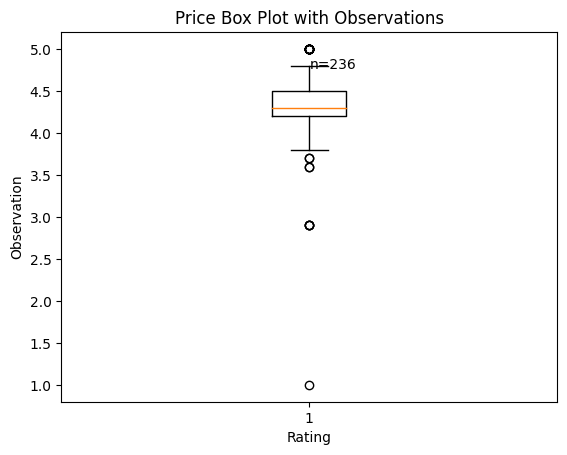

In [180]:
#BoxPlot
plt.boxplot(data['rating'])
plt.xlabel('Rating')
plt.ylabel('Observation')
plt.title('Price Box Plot with Observations')
plt.annotate(f"n={len(data['rating'])}", (0.5, 0.9), xycoords='axes fraction')
plt.show()

**Ploting no of Reviews for each product**

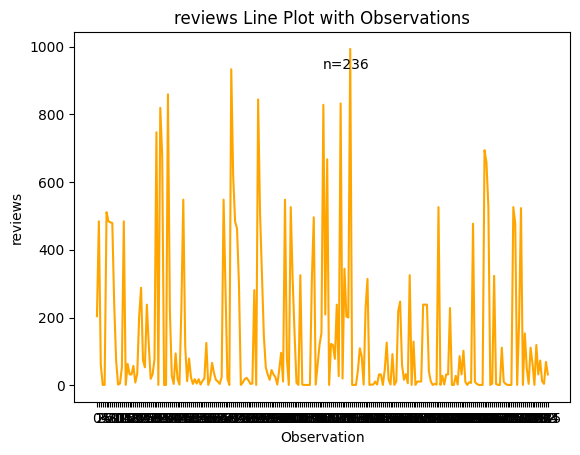

In [127]:
# Line plot for reviews
plt.plot(data['reviews'], color='orange')
plt.xlabel('Observation')
plt.ylabel('reviews')
plt.title('reviews Line Plot with Observations')
plt.xticks(range(len(data['reviews'])))
plt.annotate(f"n={len(data['reviews'])}", (0.5, 0.9), xycoords='axes fraction')
plt.show()

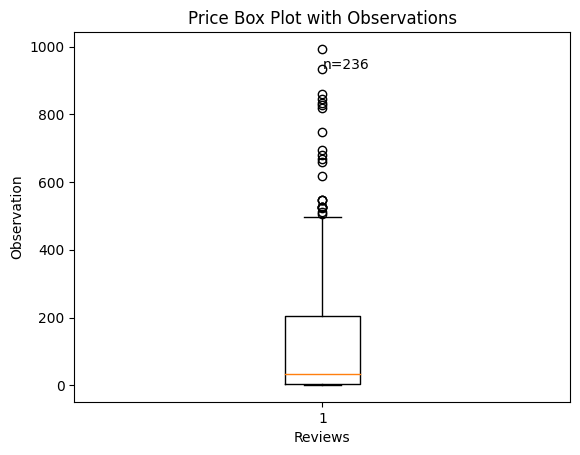

In [181]:
#BoxPlot
plt.boxplot(data['reviews'])
plt.xlabel('Reviews')
plt.ylabel('Observation')
plt.title('Price Box Plot with Observations')
plt.annotate(f"n={len(data['reviews'])}", (0.5, 0.9), xycoords='axes fraction')
plt.show()

In [128]:
data['title'].head()

0    Dell 2022 Newest Inspiron 15 Laptop, 15.6" HD ...
1    Dell 2022 Newest Inspiron 3000 Laptop, 15.6 HD...
2    Dell Latitude 7490 14' FHD Laptop PC - Intel C...
3    Fast Dell Latitude E5470 HD Business Laptop No...
4    Dell Latitude E7470 14in Laptop, Core i5-6300U...
Name: title, dtype: object

The code matches brand names from the given list with the lower-cased 'title' column and assigns the corresponding brand to a new 'brand' column in the DataFrame data. The code then removes the temporary 'lower_title' column.

In [146]:
brands = ['Macbook', 'ASUS', 'DELL', 'SAMSUNG', 'Acer', 'HP', 'Toshiba', 'Lenovo','Lifebook','ApoloSign','Microsoft']

# Create brand column
data['brand'] = ''

# Convert title and brands to lower case
data['lower_title'] = data['title'].str.lower()
lower_brands = [brand.lower() for brand in brands]

# Iterate over each brand and check for a match in the lower_title
for brand in lower_brands:
    data.loc[data['lower_title'].str.contains(brand, case=False), 'brand'] = brand.capitalize()

# Remove the temporary lower_title column
data = data.drop(columns=['lower_title'])

In [147]:
data['brand'].sample(10)

210       Asus
216       Asus
144    Samsung
213    Samsung
149    Samsung
208       Acer
148    Samsung
156    Samsung
138         Hp
163    Samsung
Name: brand, dtype: object

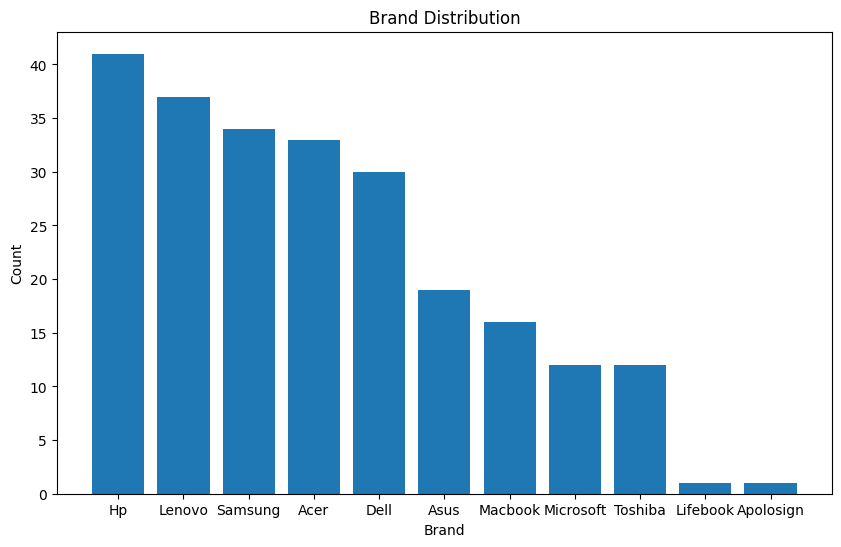

In [149]:
# Count the occurrences of each brand
brand_counts = data['brand'].value_counts()

# Increase the width of the graph
plt.figure(figsize=(10, 6))
# Create a bar plot
plt.bar(brand_counts.index, brand_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution')
plt.show()

In [150]:
data.head()

,title,price,rating,reviews,availability,brand
0,"Dell 2022 Newest Inspiron 15 Laptop, 15.6"" HD ...",390.00,4.1,204,In Stock,Dell
1,"Dell 2022 Newest Inspiron 3000 Laptop, 15.6 HD...",296.02,3.9,484,Only 13 left in stock - order soon,Dell
2,Dell Latitude 7490 14' FHD Laptop PC - Intel C...,226.62,3.8,61,Only 12 left in stock - order soon.,Dell
3,Fast Dell Latitude E5470 HD Business Laptop No...,173.00,4.1,1,In Stock.,Dell
4,"Dell Latitude E7470 14in Laptop, Core i5-6300U...",169.90,4.2,1,In Stock.,Dell


**K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm used for grouping data points into K distinct clusters based on their similarities. The algorithm starts by randomly initializing K cluster centers and iteratively assigns data points to the nearest cluster based on distance calculations. The cluster centers are then updated by calculating the mean of the assigned data points. This process continues until convergence is reached. K-means clustering is commonly used in various applications such as customer segmentation, image segmentation, anomaly detection, and recommendation systems. However, it is sensitive to the initial choice of cluster centers and may converge to suboptimal solutions. Techniques such as multiple runs with different initializations or using variations of K-means can help mitigate this issue. By applying K-means clustering, patterns and structures within the data can be identified, providing valuable insights for analysis and decision-making.

In [156]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [164]:
#Selecting Data
selected_data = data[['price', 'rating', 'reviews']]

In [171]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected data using the scaler
scaled_data = scaler.fit_transform(selected_data)

In [170]:
# Determine the number of clusters
num_clusters = 5

In [172]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


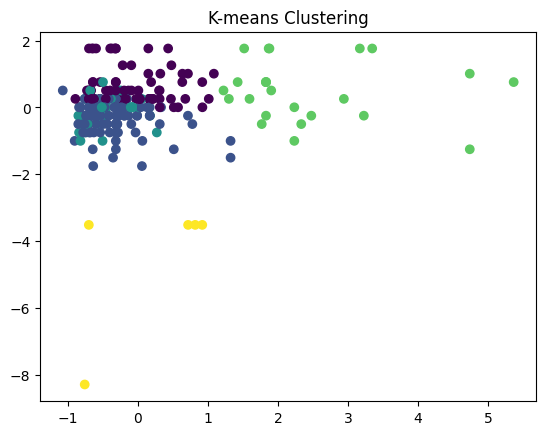

In [173]:
# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels)
plt.title('K-means Clustering')
plt.show()

**AgglomerativeClustering**

Agglomerative clustering is a hierarchical clustering algorithm that groups similar data points into clusters by iteratively merging the closest clusters based on a proximity measure. It starts with each data point as a separate cluster and progressively merges them until the desired number of clusters is obtained. The algorithm forms a dendrogram, illustrating the hierarchy of cluster merges. Agglomerative clustering is useful for exploring complex data structures, identifying clusters at different granularity levels, and understanding inter-cluster relationships. The choice of proximity measure and linkage criterion impacts the merging process. Agglomerative clustering provides a flexible and interpretable approach to clustering, enabling the discovery of meaningful groups based on similarity.

In [174]:
from sklearn.cluster import AgglomerativeClustering

# Select columns for clustering
selected_columns = ['price', 'rating', 'reviews']

# Extract the selected columns from the data
selected_data = data[selected_columns]

# Create an instance of AgglomerativeClustering
num_clusters = 5  # Number of desired clusters

In [175]:
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)

# Fit the Agglomerative Clustering model to the selected data
cluster_labels = agg_cluster.fit_predict(selected_data)

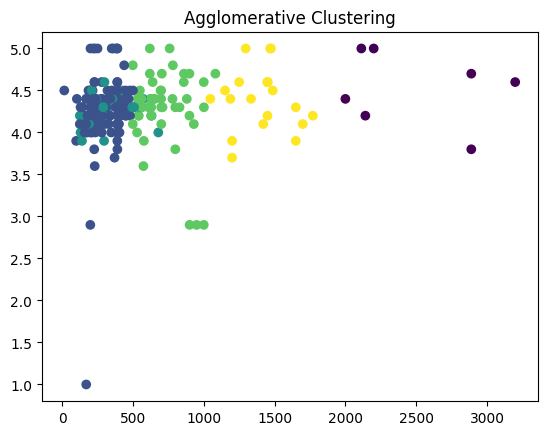

In [176]:
# Plotting the clusters
plt.scatter(selected_data['price'], selected_data['rating'], c=cluster_labels)
plt.title('Agglomerative Clustering')
plt.show()

In [178]:
data.to_csv('Final.csv',index=False)

In [182]:
data.columns


Index(['title', 'price', 'rating', 'reviews', 'availability', 'brand'], dtype='object')